# Path Visualization

A quick tool to visualize the path produced by a YAML formatted graph.

### Load required modules

First install the required moules to be able to run this code

In [2]:
!pip install git+https://github.com/mmayers12/path_plots
!pip install -U PyYAML
!pip uninstall networkx -y
!pip install networkx==2.5

  Cloning https://github.com/mmayers12/path_plots to /tmp/pip-req-build-oawru71u
  Running command git clone -q https://github.com/mmayers12/path_plots /tmp/pip-req-build-oawru71u
Found existing installation: networkx 2.5
Uninstalling networkx-2.5:
  Successfully uninstalled networkx-2.5
  Using cached networkx-2.5-py3-none-any.whl (1.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


### Import files

Clone the rest of the repository here so that we can use code from other files within it. Change to the newly cloned repo directory.

In [3]:
!git clone --depth 5 https://github.com/SuLab/DrugMechDB.git

Cloning into 'DrugMechDB'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 185 (delta 17), reused 152 (delta 12), pack-reused 0
Receiving objects: 100% (185/185), 5.92 MiB | 10.40 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [4]:
import os
os.chdir('DrugMechDB')

# YAML String

Please copy-paste your YAML for a DrugMechDB path below to have it visualized

In [5]:
yaml_string = """
-   directed: true
    graph:
        disease: Keratitis
        disease_mesh: MESH:D007634
        drug: cortisone acetate
        drug_mesh: MESH:D003348
        drugbank: DB:DB01380
    links:
    -   key: increases activity of
        source: MESH:D003348
        target: UniProt:P04150
    -   key: negatively regulates
        source: UniProt:P04150
        target: UniProt:P23219
    -   key: increases abundance of
        source: UniProt:P23219
        target: MESH:D011453
    -   key: located in
        source: MESH:D011453
        target: GO:0006954
    -   key: causes
        source: GO:0006954
        target: MESH:D007634
    multigraph: true
    nodes:
    -   id: MESH:D003348
        label: Drug
        name: cortisone acetate
    -   id: UniProt:P04150
        label: Protein
        name: Glucocorticoid receptor
    -   id: UniProt:P23219
        label: Protein
        name: COX genes
    -   id: MESH:D011453
        label: ChemicalSubstance
        name: Prostaglandins
    -   id: GO:0006954
        label: BiologicalProcess
        name: Inflammation
    -   id: MESH:D007634
        label: Disease
        name: Keratitis
    reference: https://go.drugbank.com/drugs/DB01380#mechanism-of-action
"""

### Import the required packages

Import the plotting and testing code for the path

In [6]:
# Imports throw a couple warnings, so for cleanliness, suppress them.
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
from path_plots import dmdb_plots as dp

from utils.pathtester import PathTester

### Convert the YAML string to a path

In [7]:
from io import StringIO

with StringIO(yaml_string) as f:
    path = nx.read_yaml(f)
    
    ### Allow for direct copy-paste from indication_paths.yaml
    if type(path) == list:
        path = path[0]

## Validate Path

This next block of code will run a set of validation processes on the YAML for the path.

If there are any errors within the path, an error message describing the problem will be displayed and the remaining plotting code will fail to run.  The errors must be corrected before the plots below can be displayed

If no errors are found `valid path` will be printed.

In [8]:
test = PathTester(path)
test.run_tests()
print('valid path')

valid path


## Path Plot

### Node color legend

Below we will draw the color legend for different node types

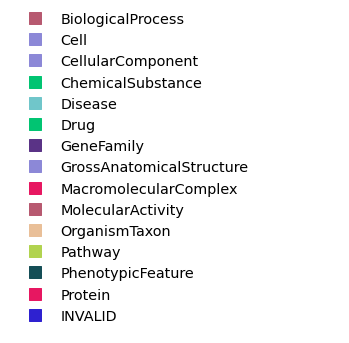

In [9]:
dp.plot_node_legend();

## Path

Below the drug to disease path will be plotted.  

Also please ensure the colors for the node labels match that of those shown in the legend above, and not the INVALID color.

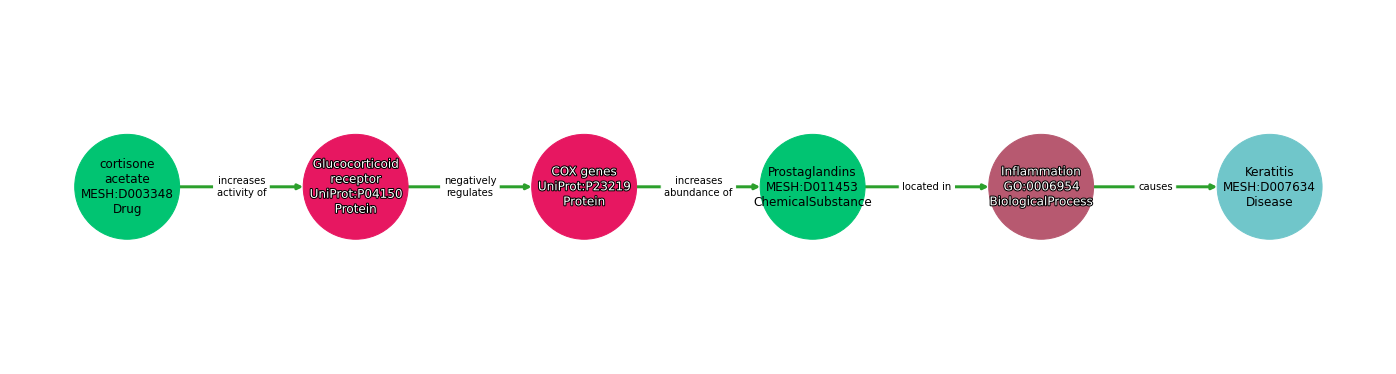

In [10]:
dp.plot_path(path);